In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Table of Contents

- [Load Data and Data Cleaning](#Load-Data-and-Data-Cleaning)
  - [Missing Values](#Missing-Values)
- [Visualization](#Visualization)
- [Preprocessing](#Preprocessing)
- [Models](#Models)
  - [Preliminary Run](#Preliminary-Run)
  - [Oversampling](#Oversampling)
  - [Hyperparameter Tuning](#Hyperparameter-Tuning)
    - [Logistic Regression](#Logistic-Regression)
    - [Random Forest](#Random-Forest)
    - [XGBoost](#XGBoost)

<h1>Data Cleaning</h1>

In [2]:
 df = pd.read_csv('data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 649
columns: 33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

<h2>Missing Value</h2>

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<h1>Visualization</h1>

In [8]:
def show_numeric(numeric_cols, n_cols=4):
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        sns.kdeplot(data=df, x=col, fill=True, ax=axes[i], color='skyblue')
        axes[i].set_title(col, fontsize=12)

    plt.tight_layout()
    plt.show()

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

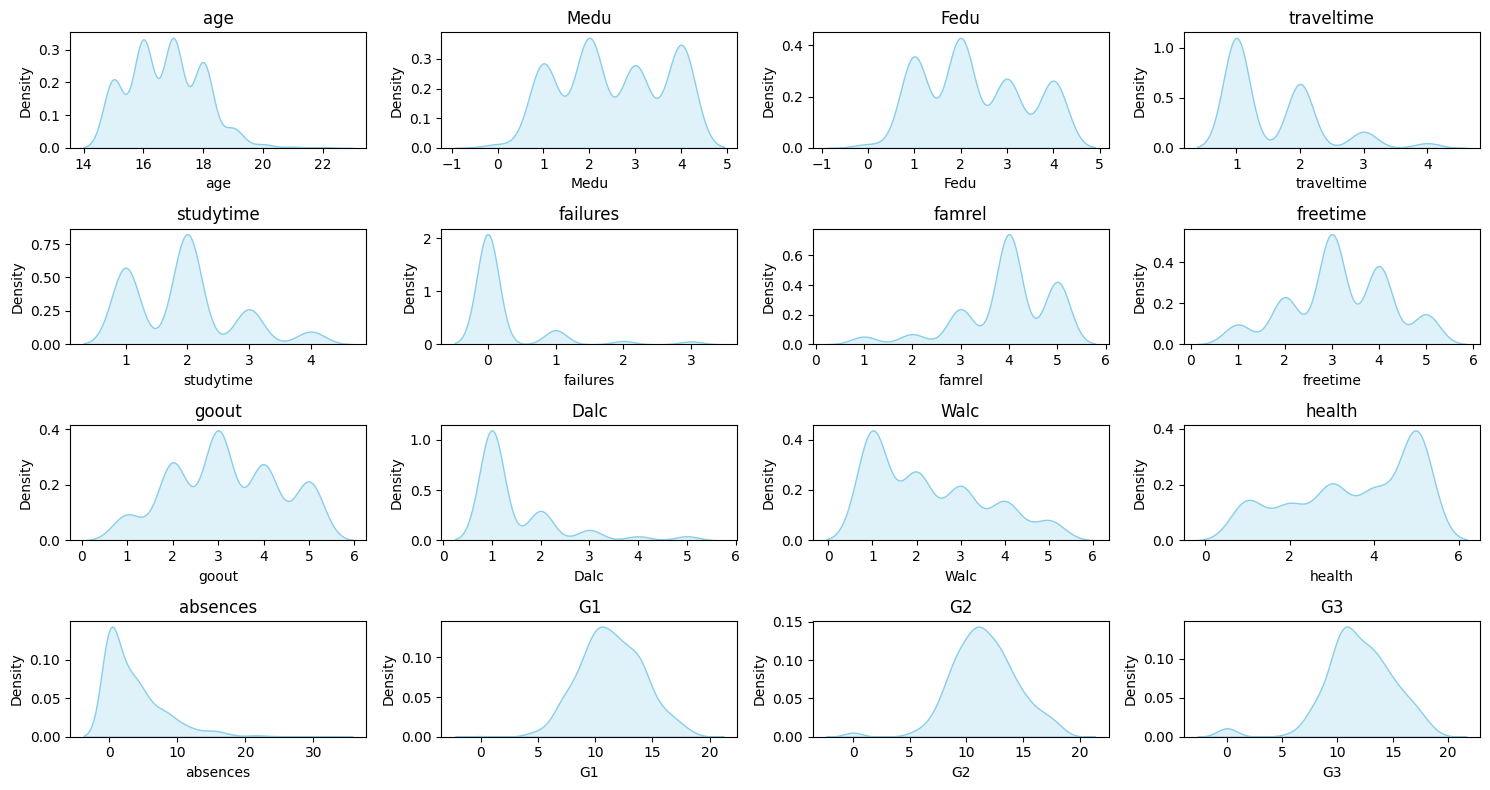

In [10]:
show_numeric(numeric_cols)

In [11]:
def show_numeric_g3(numeric_cols, n_cols=3):
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
    axes = axes.flatten()

    cols = []
    for col in numeric_cols:
        if col != "G3":
            cols.append(col)
    
    for i, col in enumerate(cols):
        sns.regplot(data=df, x=col, y='G3', ax=axes[i],
                    scatter_kws={'alpha':0.5, 's':40},
                    line_kws={'color':'red'}, color='skyblue')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("G3")
    
    # Remove unused subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

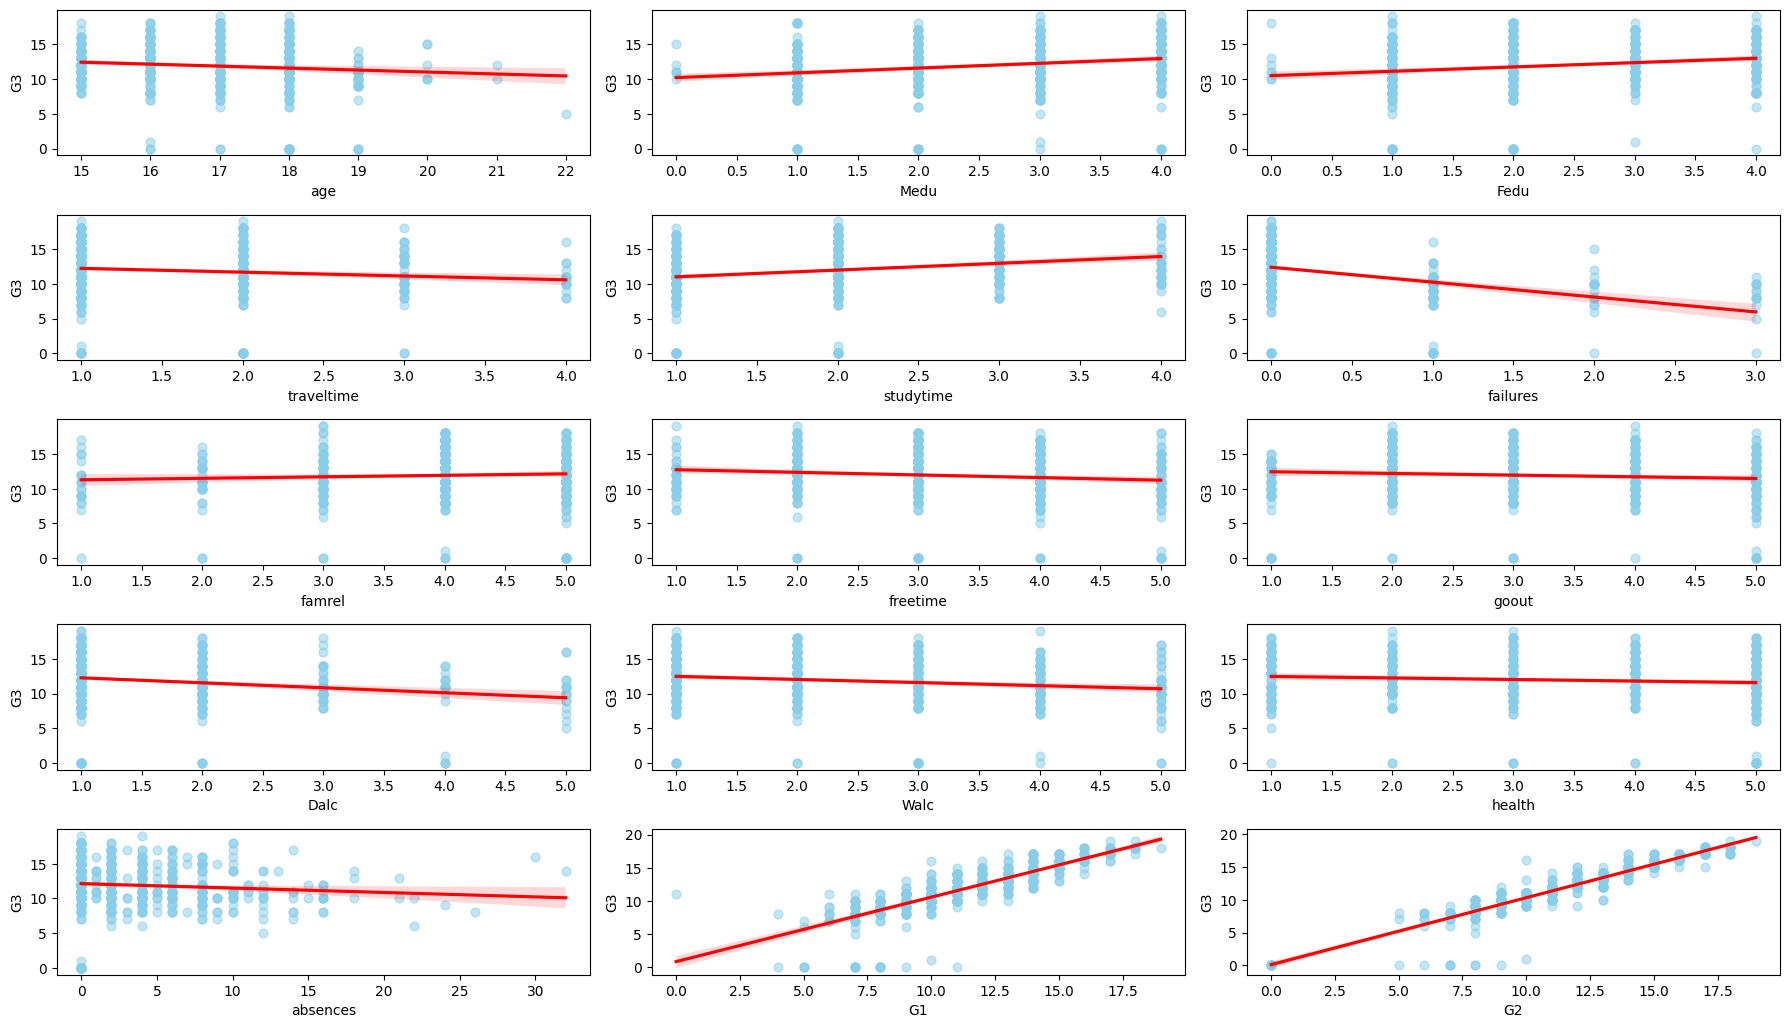

In [12]:
show_numeric_g3(numeric_cols)

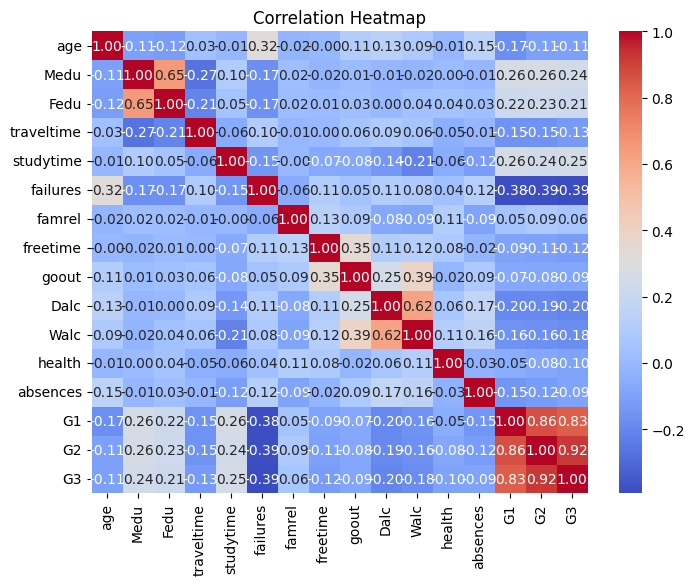

In [13]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
def show_categorical(categorical_cols, n_cols=4):
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i],
                      order=df[col].value_counts().index, color='skyblue')
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

In [15]:
categorical_cols = df.select_dtypes(include='object').columns

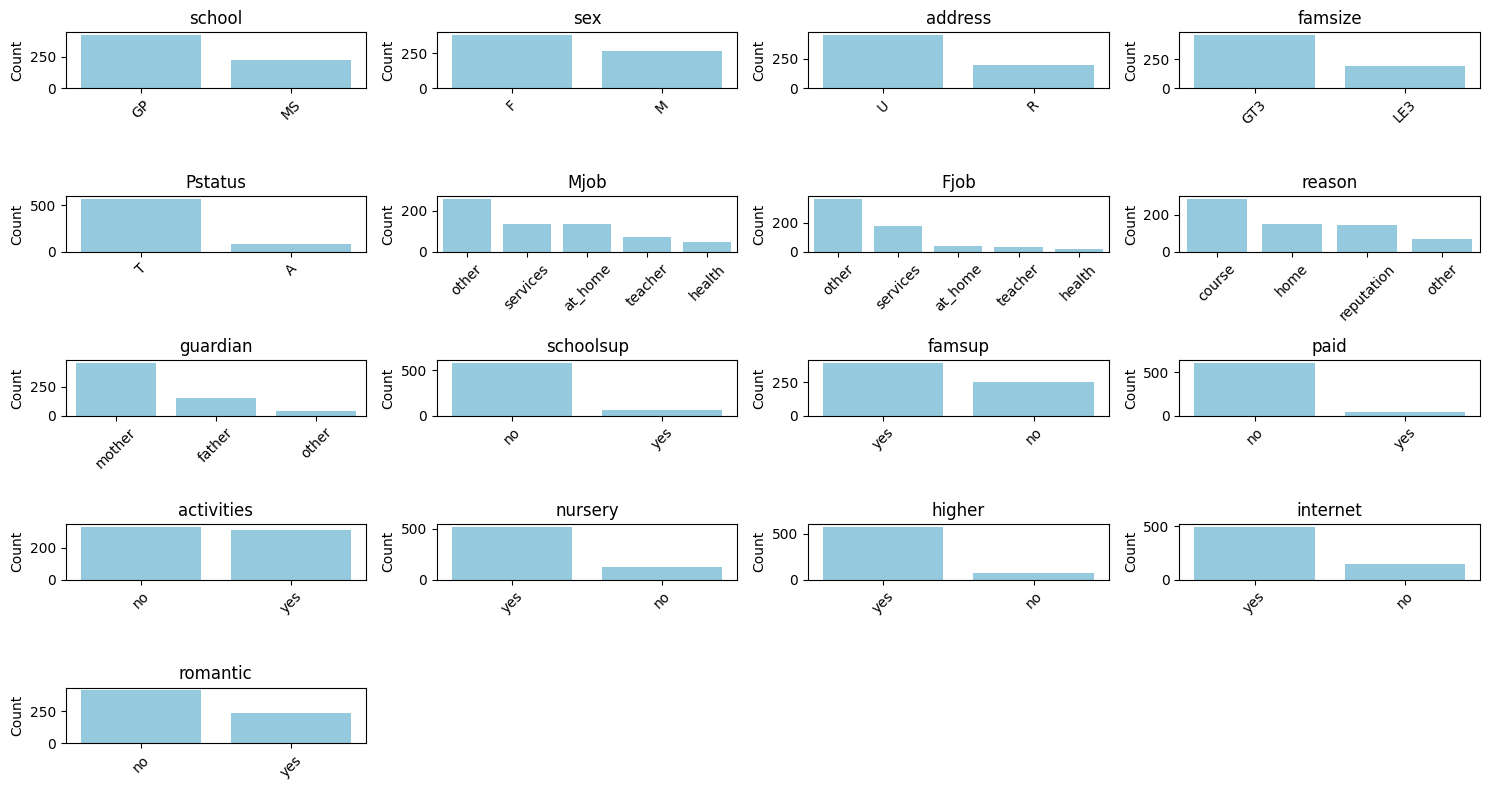

In [16]:
show_categorical(categorical_cols)

In [17]:
def show_categorical_d3(categorical_cols, n_cols=4):
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.boxplot(data=df, x=col, y='G3', ax=axes[i], color='skyblue')
        axes[i].set_title(f"G3 vs {col}", fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('G3')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

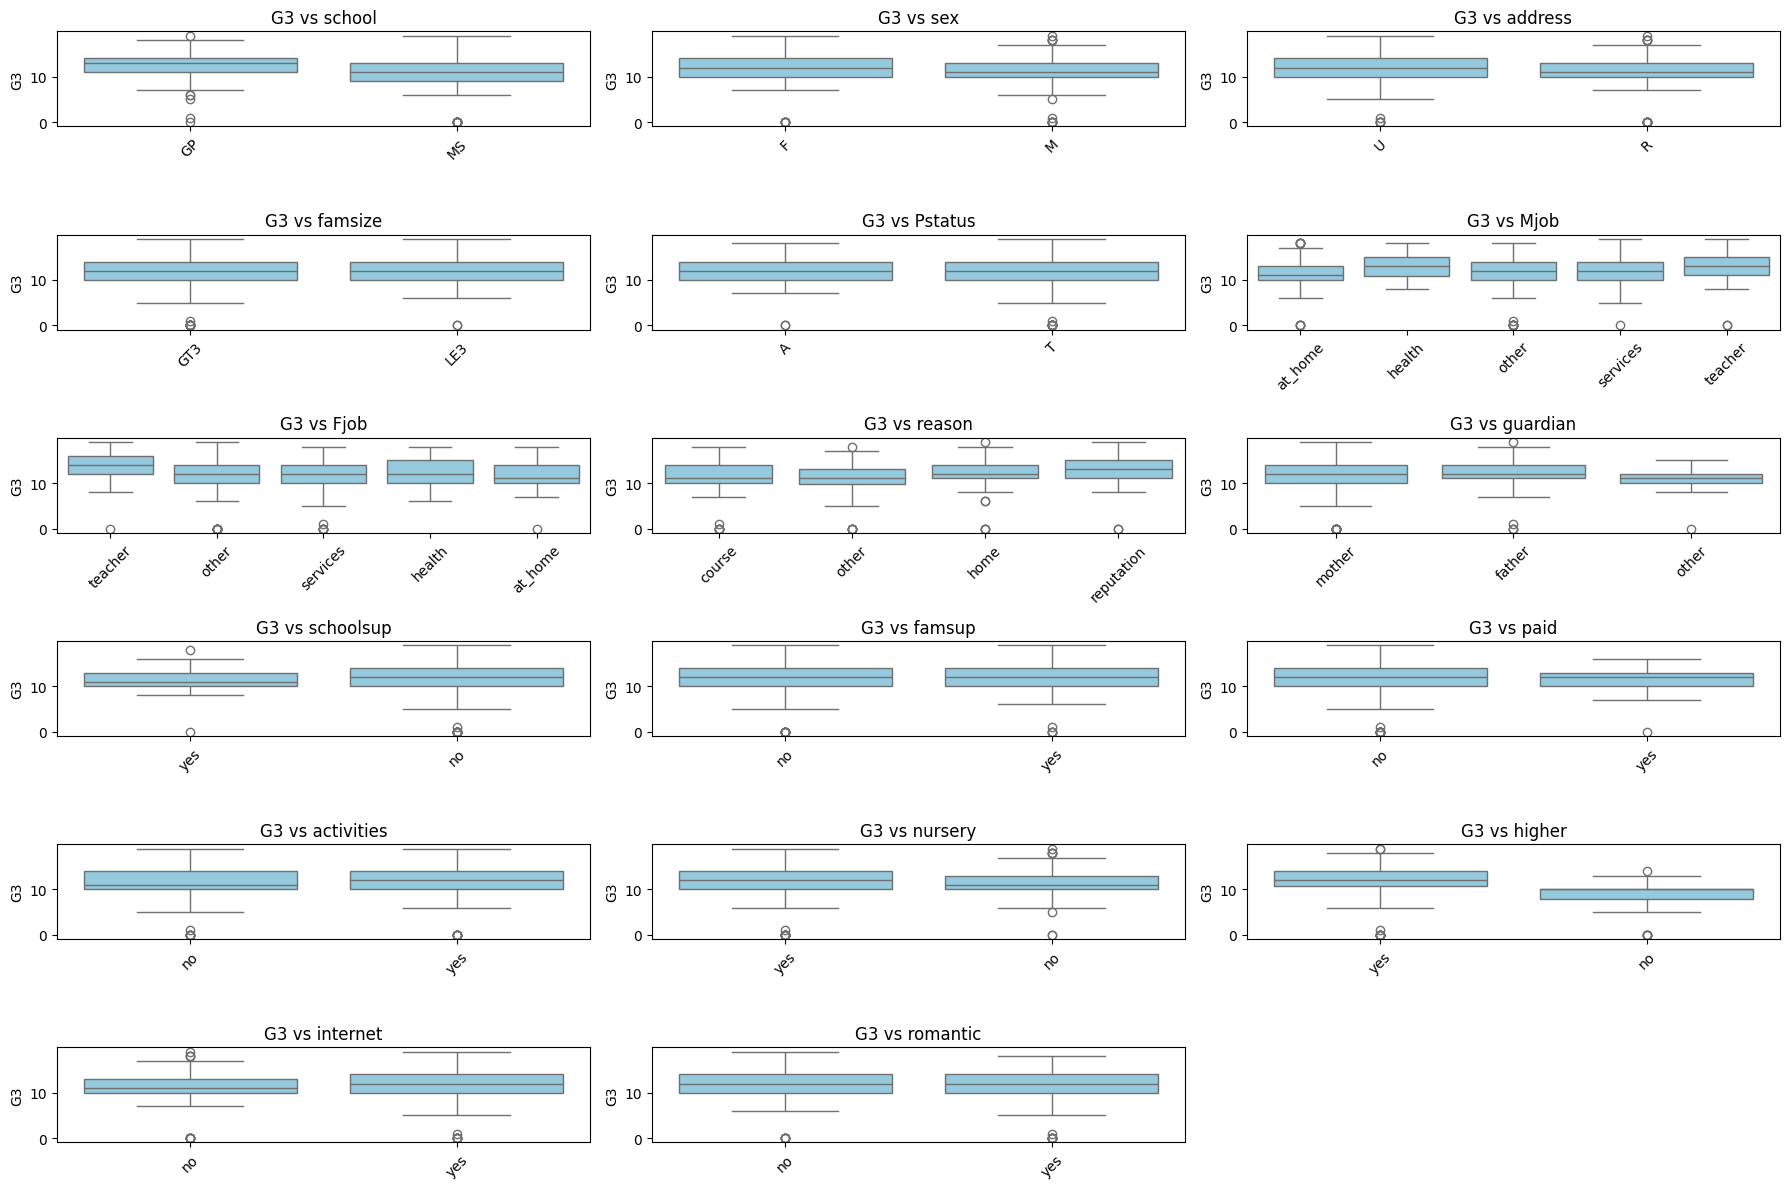

In [18]:
show_categorical_d3(categorical_cols)

<h1>Preprocessing</h1>

In [19]:
full_score = 20
df.loc[df['G3'] >= 0.8 * full_score, 'performance_is_good'] = 1
df.loc[df['G3'] < 0.8 * full_score, 'performance_is_good'] = 0
df.head(10)[['G3', 'performance_is_good']]

,G3,performance_is_good
0,11,0.0
1,11,0.0
2,12,0.0
3,14,0.0
4,13,0.0
5,13,0.0
6,13,0.0
7,13,0.0
8,17,1.0
9,13,0.0


In [20]:
df = df.drop(["G1", "G2", "G3"], axis=1)

In [21]:
X_full = df.drop(columns=['performance_is_good'])
y_full = df['performance_is_good']

In [22]:
numeric_cols = X_full.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_full.select_dtypes(include=['object']).columns

In [23]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [24]:
X_full = pd.get_dummies(X_full, columns=categorical_cols, drop_first=True)

In [25]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  school_MS          649 non-null    bool 
 14  sex_M              649 non-null    bool 
 15  address_U          649 non-null    bool 
 16  famsize_LE3        649 non-null    bool 
 17  Pstatus_T       

In [26]:
boolean_columns = X_full.select_dtypes(include='bool').columns

for col in boolean_columns:
    X_full[col] = X_full[col].astype(int)

In [27]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  school_MS          649 non-null    int64
 14  sex_M              649 non-null    int64
 15  address_U          649 non-null    int64
 16  famsize_LE3        649 non-null    int64
 17  Pstatus_T       

In [28]:
def normalize_col(col):
    X_full[col]=(X_full[col]-X_full[col].mean())/X_full[col].std()

In [29]:
cols_to_normalize = ["age", "Medu", "traveltime", "studytime", "failures", "famrel", 
                  "freetime", "goout", "Dalc", "Dalc", "health", "absences"]

In [30]:
for col in cols_to_normalize:
    normalize_col(col)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (519, 39)
Test set shape: (130, 39)


In [32]:
def evaluate(y_pred, y_label, show_confusion_m=False):
    print("Accuracy:", accuracy_score(y_label, y_pred))
    print("\nClassification Report:\n", classification_report(y_label, y_pred))
    
    if show_confusion_m:
        cm_lr = confusion_matrix(y_label, y_pred)
        sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

def evaluate_model(model, show_confusion_m=False):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("\nTraining\n")
    evaluate(y_pred_train, y_train, show_confusion_m)

    print("\nTest\n")
    evaluate(y_pred_test, y_test, show_confusion_m)

<h1>Models</h1>

<h2>Preliminary Run</h2>

<h3>Logistic Regression</h3>

In [33]:
model_logistic = LogisticRegression(max_iter=2000, random_state=42)
model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [34]:
evaluate_model(model_logistic)


Training

Accuracy: 0.8882466281310212

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       453
         1.0       0.79      0.17      0.28        66

    accuracy                           0.89       519
   macro avg       0.84      0.58      0.61       519
weighted avg       0.88      0.89      0.85       519


Test

Accuracy: 0.8538461538461538

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       114
         1.0       0.00      0.00      0.00        16

    accuracy                           0.85       130
   macro avg       0.44      0.49      0.46       130
weighted avg       0.77      0.85      0.81       130



In [35]:
((y_test == 1).sum() / len(y_test))

np.float64(0.12307692307692308)

In [36]:
y_pred_prob_logistic = model_logistic.predict_proba(X_test)[:, 1]

In [37]:
new_threshold = 0.3
y_pred_custom_threshold = np.where(y_pred_prob_logistic >= new_threshold, 1, 0)

In [38]:
evaluate(y_pred_custom_threshold, y_test)

Accuracy: 0.7307692307692307

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       114
         1.0       0.09      0.12      0.10        16

    accuracy                           0.73       130
   macro avg       0.48      0.47      0.47       130
weighted avg       0.77      0.73      0.75       130



In [39]:
model_logistic_balanced = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
model_logistic_balanced.fit(X_train, y_train)

y_pred_logistic_bal = model_logistic_balanced.predict(X_test)

In [40]:
evaluate_model(model_logistic_balanced)


Training

Accuracy: 0.7552986512524085

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       453
         1.0       0.32      0.80      0.45        66

    accuracy                           0.76       519
   macro avg       0.64      0.78      0.65       519
weighted avg       0.88      0.76      0.79       519


Test

Accuracy: 0.6230769230769231

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.64      0.75       114
         1.0       0.16      0.50      0.25        16

    accuracy                           0.62       130
   macro avg       0.53      0.57      0.50       130
weighted avg       0.81      0.62      0.69       130



<h3>K Nearest Neighbor</h3>

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
evaluate_model(knn)


Training

Accuracy: 0.8921001926782274

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       453
         1.0       0.67      0.30      0.42        66

    accuracy                           0.89       519
   macro avg       0.79      0.64      0.68       519
weighted avg       0.88      0.89      0.87       519


Test

Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       114
         1.0       0.25      0.12      0.17        16

    accuracy                           0.85       130
   macro avg       0.57      0.54      0.54       130
weighted avg       0.81      0.85      0.82       130



<h3>Random Forest</h3>

In [43]:
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
evaluate_model(model_rf)


Training

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       453
         1.0       1.00      1.00      1.00        66

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519


Test

Accuracy: 0.8769230769230769

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       114
         1.0       0.00      0.00      0.00        16

    accuracy                           0.88       130
   macro avg       0.44      0.50      0.47       130
weighted avg       0.77      0.88      0.82       130



/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<h3>Observations</h3>

1. All models are overfitting to some degree. Random forest with the default hyperparameters overfit most severely.
2. Due to the positive class being under represented (1, performance_is_good), all models seem to favor the nagative class (0, not performance_is_good).

<div>We will address 1 by adding regularzation or/and tuning parameters.</div>
<div>We will address 2 by oversampling the positve class in the train sample. </div>

<h2>Oversampling</h2>

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [46]:
for model_name, model in [
    ["Logistic Regression", LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)],
    ["k-nearest Neighbors", KNeighborsClassifier(n_neighbors=5)],
    ["Random Forest", RandomForestClassifier(class_weight='balanced', random_state=42)]
]:
    print(f"\n----{model_name}----\n")
    model.fit(X_resampled, y_resampled)
    evaluate_model(model)
    


----Logistic Regression----


Training

Accuracy: 0.8400770712909441

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       453
         1.0       0.39      0.44      0.41        66

    accuracy                           0.84       519
   macro avg       0.65      0.67      0.66       519
weighted avg       0.85      0.84      0.84       519


Test

Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       114
         1.0       0.10      0.19      0.13        16

    accuracy                           0.69       130
   macro avg       0.48      0.48      0.47       130
weighted avg       0.78      0.69      0.73       130


----k-nearest Neighbors----


Training

Accuracy: 0.7225433526011561

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.68      0

<h2>Hyperparamter Tuning</h2>

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [48]:
def find_and_evaluate_best(model, param_grid):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation F1 Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_

    evaluate_model(best_model, show_confusion_m=True)
    

<h3>Logistic Regression</h3>

Best Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear'}
Best Cross-Validation F1 Score: 0.33854830440196293

Training

Accuracy: 0.7822736030828517

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       453
         1.0       0.32      0.62      0.42        66

    accuracy                           0.78       519
   macro avg       0.63      0.71      0.64       519
weighted avg       0.86      0.78      0.81       519



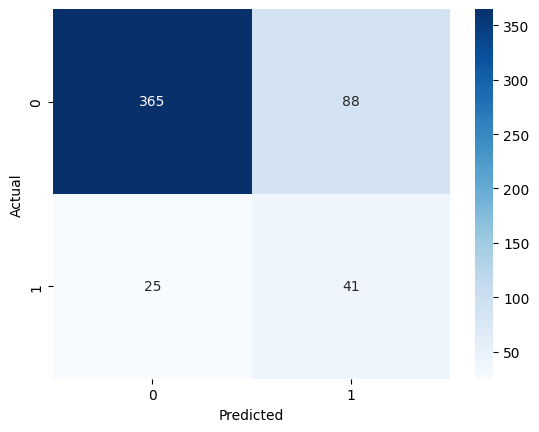


Test

Accuracy: 0.6615384615384615

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.70      0.78       114
         1.0       0.15      0.38      0.21        16

    accuracy                           0.66       130
   macro avg       0.52      0.54      0.50       130
weighted avg       0.80      0.66      0.71       130



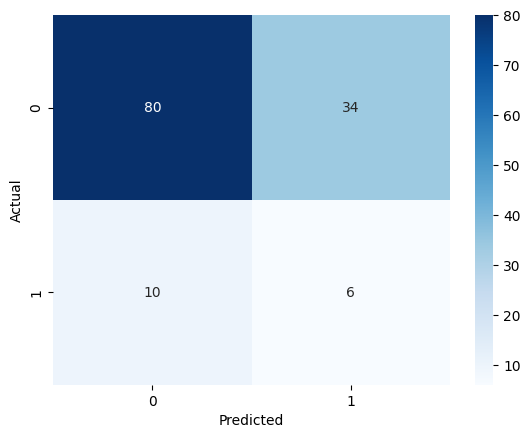

In [49]:
from imblearn.pipeline import Pipeline

pipe_logistic = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'))
])
param_grid_logistic = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear'] 
}
find_and_evaluate_best(pipe_logistic, param_grid_logistic)

<h3>Random Forest</h3>

/Users/yzhang/miniconda3/envs/data/lib/python3.11/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Best Cross-Validation F1 Score: 0.25482456140350873

Training

Accuracy: 0.9556840077071291

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       453
         1.0       0.92      0.71      0.80        66

    accuracy                           0.96       519
   macro avg       0.94      0.85      0.89       519
weighted avg       0.95      0.96      0.95       519



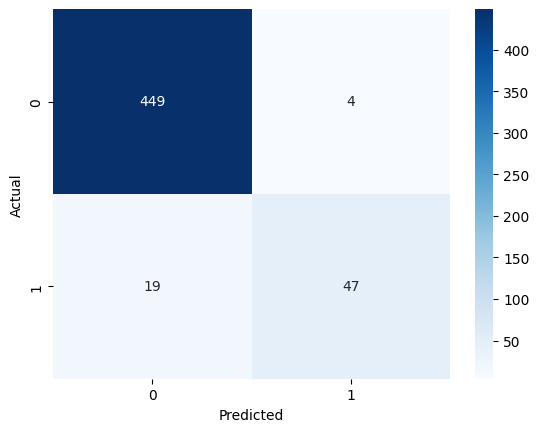


Test

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       114
         1.0       0.00      0.00      0.00        16

    accuracy                           0.80       130
   macro avg       0.43      0.46      0.44       130
weighted avg       0.76      0.80      0.78       130



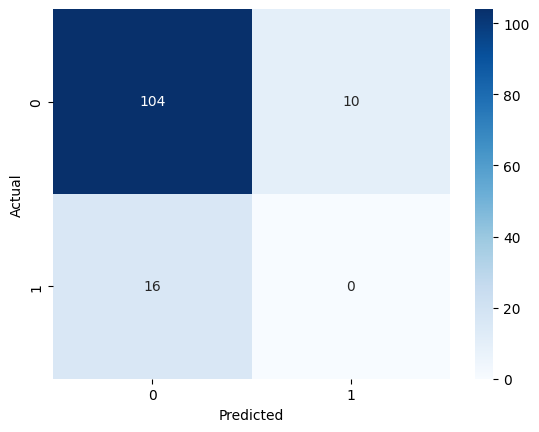

In [50]:
pipe_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}
find_and_evaluate_best(pipe_rf, param_grid_rf)

<h3>XGBoost</h3>

Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__scale_pos_weight': 5, 'xgb__subsample': 0.8}
Best Cross-Validation F1 Score: 0.36621819621819623

Training

Accuracy: 0.905587668593449

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       453
         1.0       0.57      1.00      0.73        66

    accuracy                           0.91       519
   macro avg       0.79      0.95      0.84       519
weighted avg       0.95      0.91      0.92       519



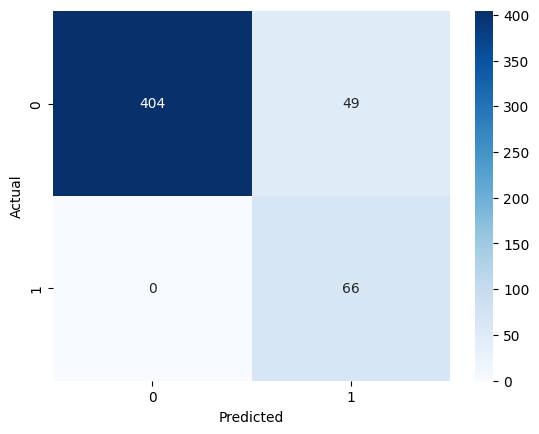


Test

Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       114
         1.0       0.15      0.31      0.20        16

    accuracy                           0.69       130
   macro avg       0.52      0.53      0.50       130
weighted avg       0.79      0.69      0.73       130



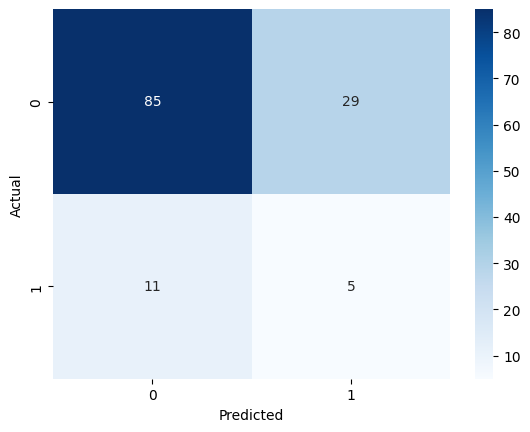

In [51]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__scale_pos_weight': [1, 2, 5]  # can help for imbalance
}
find_and_evaluate_best(pipe_xgb, param_grid_xgb)